In [1]:
# determine_resolution.ipy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import optimize
from scipy.stats import norm
import math
import sys
import os
import copy

sns.set_style("white")
sns.set_context("talk")
resolution = 10000
chr_name_list = ["chr"+str(i) for i in range(1,20)]


In [2]:
#获得给定的resolution、给定的chr的，对应实验的capture情况
def get_capture_data(resolution, dir_combine, experiment,cell_list,chr_name):
    # resolution = 1000
    # experiment = "gam_seq_mapped_219"
    # cell_list = ["Cell17", "Cell18", "Cell19", "Cell20"]
    # chr_name = "chr14"
    # dir_combine = "/home/ygli/gam_paper_data/"+experiment+"/overlap_result_"+chr_name+"_"+str(resolution)+"/combine/"+cell_list[-1]+"_mm10_combine.txt"

    capture = pd.read_csv(dir_combine,sep='\t')
    for cell in cell_list:
        capture[cell+"capture_or_not"] = [i[cell]!='0' for _,i in capture.iterrows()]

    return capture
# capture.head()



In [5]:
# "/home/ygli/gam_paper_data/"+experiment+"/overlap_result_"+chr_name+"_"+str(resolution)+"/combine/"+cell_list[-1]+"_mm10_combine.txt"

In [6]:
#获得给定的resolution、所有chr的，对应实验的capture情况
def get_capture_data_all_chr(resolution, experiment, cell_list):
    all_chr_capture_list_exp = []

    for chr_name in chr_name_list:
        print(chr_name)
        dir_combine = "/home/ygli/gam_paper_data/"+experiment+"/overlap_result_"+chr_name+"_"+str(resolution)+"/combine/"+cell_list[-1]+"_mm10_combine.txt"
        capture_chr = get_capture_data(resolution, dir_combine, experiment, cell_list, chr_name)
        all_chr_capture_list_exp.append(capture_chr)
    
    all_chr_capture_exp = pd.concat(all_chr_capture_list_exp, ignore_index=True)
    all_chr_capture_exp['resolution'] = [resolution]*len(all_chr_capture_exp)
    # all_chr_capture_exp.head()
    return all_chr_capture_exp 


In [7]:
#计算所有resolution、所有chr的，对应实验的capture情况
resolution = 1000
resolution_all = [1000, 10000, 100000, 1000000]
experiment = "gam_seq_mapped_219"
cell_list = ["Cell17", "Cell18", "Cell19", "Cell20"]

all_reso_all_chr_capture_219_list = []
for resolution in resolution_all:
    print(resolution)
    all_chr_capture_219_resolution = get_capture_data_all_chr(resolution, experiment, cell_list)
    all_reso_all_chr_capture_219_list.append(all_chr_capture_219_resolution)

all_reso_all_chr_capture_219 = pd.concat(all_reso_all_chr_capture_219_list, ignore_index=True)


1000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
10000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
100000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
1000000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19


In [8]:
resolution_all = [1000, 10000, 100000, 1000000]
experiment = "gam_seq_mapped_414"
cell_list = ["Cell25", "Cell26", "Cell27", "Cell28", "Cell29", "Cell38", "Cell39"]
all_chr_capture_list_414 = []

all_reso_all_chr_capture_414_list = []
for resolution in resolution_all:
    print(resolution)
    all_chr_capture_414_resolution = get_capture_data_all_chr(resolution, experiment, cell_list)
    all_reso_all_chr_capture_414_list.append(all_chr_capture_414_resolution)

all_reso_all_chr_capture_414 = pd.concat(all_reso_all_chr_capture_414_list, ignore_index=True)


1000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
10000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
100000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
1000000
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19


In [9]:
all_reso_all_chr_capture_219['loci_info'] = [i.chr+'_'+str(i.begin)+'_'+str(i.end) for _,i in all_reso_all_chr_capture_219.iterrows()]
all_reso_all_chr_capture_414['loci_info'] = [i.chr+'_'+str(i.begin)+'_'+str(i.end) for _,i in all_reso_all_chr_capture_414.iterrows()]

# all_reso_all_chr_capture_414.head()

In [10]:
# all_chr_capture_total = pd.concat([all_reso_all_chr_capture_219, all_reso_all_chr_capture_414], join_axes=['loci_info'], axis=1) 
#二者本来就是对齐的，所以直接横向concat起来就可以
all_chr_capture_total = pd.concat([all_reso_all_chr_capture_219, all_reso_all_chr_capture_414], axis=1) 
# pd.set_option('max_colwidth',200)

all_chr_capture_total.head()
print(all_chr_capture_total.columns)


Index([u'chr', u'begin', u'end', u'Cell17', u'Cell18', u'Cell19', u'Cell20',
       u'Cell17capture_or_not', u'Cell18capture_or_not',
       u'Cell19capture_or_not', u'Cell20capture_or_not', u'resolution',
       u'loci_info', u'chr', u'begin', u'end', u'Cell25', u'Cell26', u'Cell27',
       u'Cell28', u'Cell29', u'Cell38', u'Cell39', u'Cell25capture_or_not',
       u'Cell26capture_or_not', u'Cell27capture_or_not',
       u'Cell28capture_or_not', u'Cell29capture_or_not',
       u'Cell38capture_or_not', u'Cell39capture_or_not', u'resolution',
       u'loci_info'],
      dtype='object')


In [17]:
all_chr_capture_total_pro = all_chr_capture_total.T.drop_duplicates().T
print(all_chr_capture_total_pro.columns)

Index([u'chr', u'begin', u'end', u'Cell17', u'Cell18', u'Cell19', u'Cell20',
       u'Cell17capture_or_not', u'Cell18capture_or_not',
       u'Cell19capture_or_not', u'Cell20capture_or_not', u'resolution',
       u'loci_info', u'Cell25', u'Cell26', u'Cell27', u'Cell28', u'Cell29',
       u'Cell38', u'Cell39', u'Cell25capture_or_not', u'Cell26capture_or_not',
       u'Cell27capture_or_not', u'Cell28capture_or_not',
       u'Cell29capture_or_not', u'Cell38capture_or_not',
       u'Cell39capture_or_not'],
      dtype='object')


In [21]:
all_chr_capture_total_pro.head()

,chr,begin,end,Cell17,Cell18,Cell19,Cell20,Cell17capture_or_not,Cell18capture_or_not,Cell19capture_or_not,...,Cell29,Cell38,Cell39,Cell25capture_or_not,Cell26capture_or_not,Cell27capture_or_not,Cell28capture_or_not,Cell29capture_or_not,Cell38capture_or_not,Cell39capture_or_not
0,chr1,0,1000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
1,chr1,1000,2000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
2,chr1,2000,3000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
3,chr1,3000,4000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
4,chr1,4000,5000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False


In [13]:
# all_chr_capture_total = pd.concat([all_reso_all_chr_capture_219, all_reso_all_chr_capture_414], axis=1) 
all_chr_capture_total = all_chr_capture_total_pro
cell_list_total = ["Cell17", "Cell18", "Cell19", "Cell20", "Cell25", "Cell26", "Cell27", "Cell28", "Cell29", "Cell38", "Cell39"]
# all_chr_capture_total = pd.concat([all_chr_capture_219], axis=1) 
# cell_list_total = ["Cell17", "Cell18", "Cell19", "Cell20"]
all_chr_capture_total.head()
capture_percent = []
resolution = []
cell_name = []
for resolution_each in resolution_all:
    part_all_chr_capture_total = all_chr_capture_total[all_chr_capture_total.resolution==resolution_each]
    for cell in cell_list_total:
        capture_num_each = part_all_chr_capture_total[cell+"capture_or_not"].sum()
        total_num_each = len(part_all_chr_capture_total[cell+"capture_or_not"])
        capture_percent_each = float(capture_num_each)/total_num_each
        capture_percent.append(capture_percent_each)
        resolution.append(resolution_each)
        cell_name.append(cell)
#         print("%s, capture num %s, total num %s, capture percent %s"%(cell, all_chr_capture_total[cell+"capture_or_not"].sum(), len(all_chr_capture_total[cell+"capture_or_not"]), float(all_chr_capture_total[cell+"capture_or_not"].sum())/len(all_chr_capture_total[cell+"capture_or_not"])))

R = 4.3
L_cut = 0.2
for cell in cell_list_total:
    num_np = len(list(set(all_chr_capture_total[cell])))
    cap_cell = num_np*(L_cut/(2*R))
    capture_percent.append(cap_cell)
    resolution.append("theory")
    cell_name.append(cell)
    
capture_percent_df = pd.DataFrame({"capture_percent":capture_percent,\
                                   "resolution":resolution, \
                                   "cell_name":cell_name})
capture_percent_df.head()

,capture_percent,cell_name,resolution
0,0.097393,Cell17,1000
1,0.060749,Cell18,1000
2,0.077371,Cell19,1000
3,0.057364,Cell20,1000
4,0.157251,Cell25,1000


# 储存算好的文件

In [3]:
# print(all_chr_capture_total.shape)
# all_chr_capture_total.head()
# all_chr_capture_total.to_csv("/home/ygli/gam_paper_data/merge_219_414_captureNP_total.csv", index=None)
# all_chr_capture_total.to_csv("/home/ygli/gam_paper_data/merge_219_414_captureNP.csv",columns=['chr', 'begin', 'end','resolution','loci_info', 'Cell17', 'Cell18', 'Cell19', 'Cell20','Cell25', 'Cell26', 'Cell27', 'Cell28', 'Cell29','Cell38', 'Cell39'], index=None)



In [19]:
all_chr_capture_total.head()

,chr,begin,end,Cell17,Cell18,Cell19,Cell20,Cell17capture_or_not,Cell18capture_or_not,Cell19capture_or_not,...,Cell29,Cell38,Cell39,Cell25capture_or_not,Cell26capture_or_not,Cell27capture_or_not,Cell28capture_or_not,Cell29capture_or_not,Cell38capture_or_not,Cell39capture_or_not
0,chr1,0,1000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
1,chr1,1000,2000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
2,chr1,2000,3000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
3,chr1,3000,4000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
4,chr1,4000,5000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False


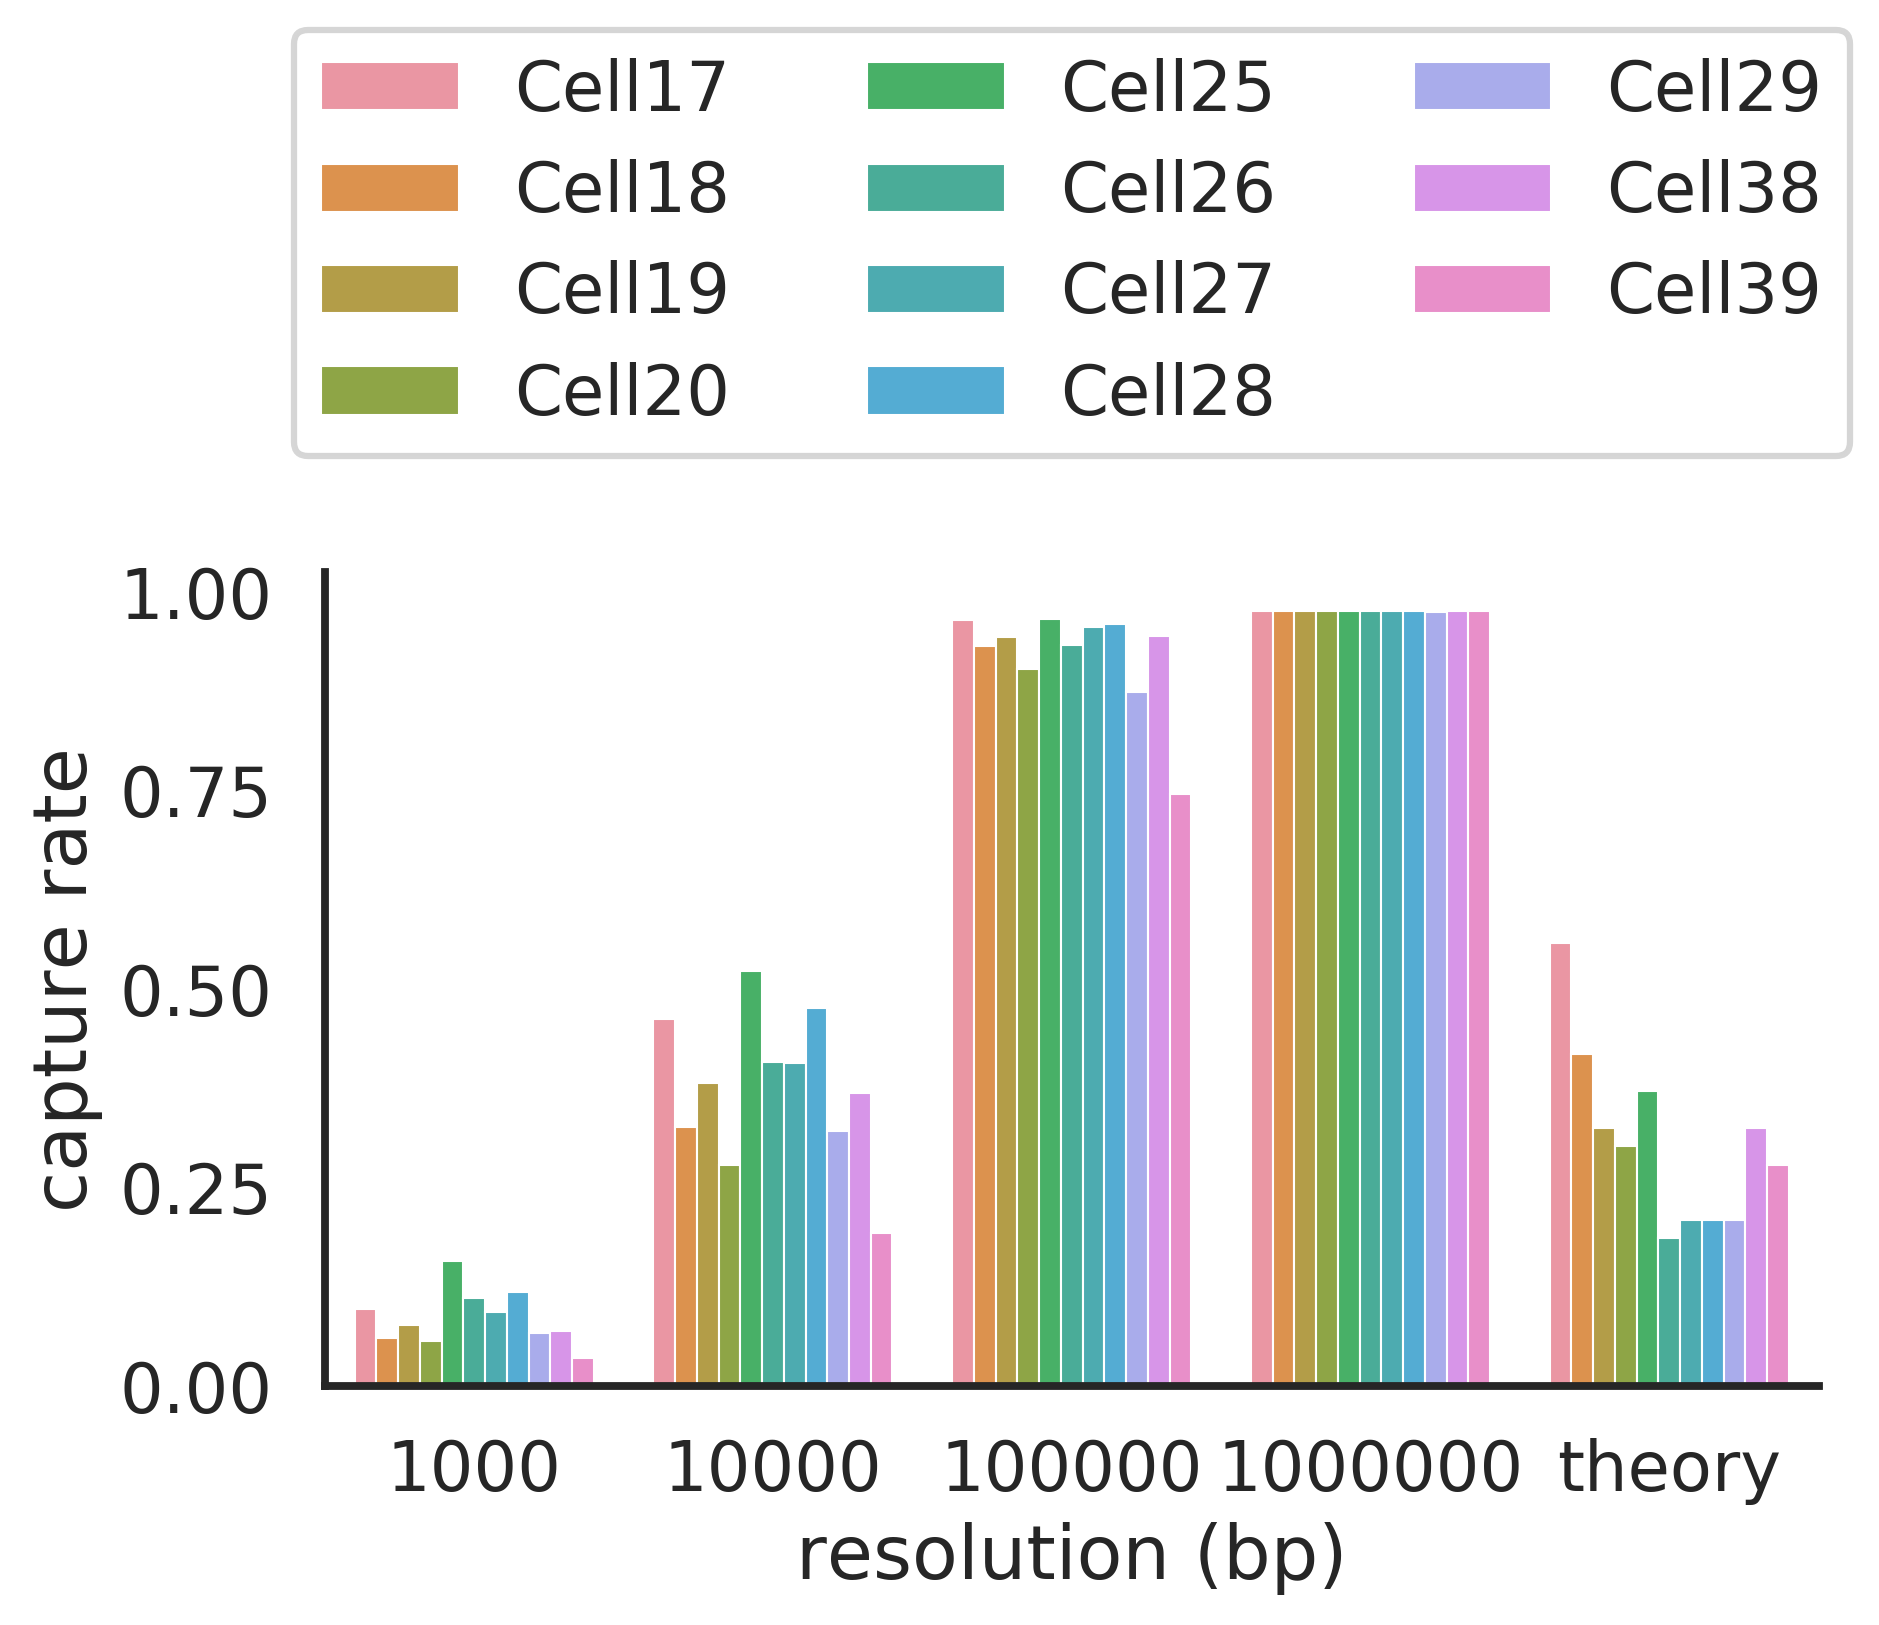

In [22]:
#plot figure of capture percent for each resolution of each cell
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
plt.tight_layout()
sns.barplot(data=capture_percent_df, x="resolution", y="capture_percent", hue="cell_name", linewidth=0.5)
# sns.violinplot(data=merge_result_bestmodel, x="dis", y="auroc", split=True, hue="label", palette={best_model: '#f37736', "1/distance":'#63ace5'}, order=['0-3kb', '3-10kb', '10-100kb', '100-1000kb', '1000kb+'],inner="quartile", linewidth=0.5)  # cbar=False
ax.title.set_text("")
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=3)
# ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),
#               fancybox=True, shadow=True, ncol=3)
# ax.set_xticklabels(['0-3'+'\n'+str(gene_num['0-3kb']), '3-10'+'\n'+str(gene_num['3-10kb']), '10-100'+'\n'+str(gene_num['10-100kb']), '100-1000'+'\n'+str(gene_num['100-1000kb']), '1000+'+'\n'+str(gene_num['1000kb+'])])
# ax.set_xticklabels(['0-3'+'\n'+str(pos_pair_num['0-3kb'])+'\n'+str(neg_pair_num['0-3kb']), \
#                     '3-10'+'\n'+str(pos_pair_num['3-10kb'])+'\n'+str(neg_pair_num['3-10kb']), \
#                     '10-100'+'\n'+str(pos_pair_num['10-100kb'])+'\n'+str(neg_pair_num['10-100kb']), \
#                     '100-1000'+'\n'+str(pos_pair_num['100-1000kb'])+'\n'+str(neg_pair_num['100-1000kb']), \
#               xie      '1000+'+'\n'+str(pos_pair_num['1000kb+'])+'\n'+str(neg_pair_num['1000kb+']) ])
# ax.set_xlabel("")
plt.gca().set_xlabel('resolution (bp)')
plt.gca().set_ylabel('capture rate')
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
    plt.gca().spines[pos].set_linewidth(0.2)
plt.gca().tick_params(width=0.2)
fig.savefig("/home/ygli/gam_paper_data/code/figure/"+"determine_resolution.pdf",format='pdf')
plt.show()


# 读取算好的文件
# 计算10kb分辨率下，每个cell每个NP的10kb loci的捕获率(这部分是不区分父本母本的，不够准确。后面区分父本母本的更准确一些)



In [17]:
all_chr_capture_total = pd.read_csv("/home/ygli/gam_paper_data/merge_219_414_captureNP_total.csv")
all_chr_capture_total.head()

,chr,begin,end,Cell17,Cell18,Cell19,Cell20,Cell17capture_or_not,Cell18capture_or_not,Cell19capture_or_not,...,Cell29,Cell38,Cell39,Cell25capture_or_not,Cell26capture_or_not,Cell27capture_or_not,Cell28capture_or_not,Cell29capture_or_not,Cell38capture_or_not,Cell39capture_or_not
0,chr1,0,1000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
1,chr1,1000,2000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
2,chr1,2000,3000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
3,chr1,3000,4000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False
4,chr1,4000,5000,0,0,0,0,False,False,False,...,0,0,0,False,False,False,False,False,False,False


In [61]:
# def get_each_np_capture_rate(target_resolution, cell_name, all_chr_capture_total):
target_resolution = 1e+4
dic_chr_size={"chr1":195471971,"chr2":182113224,"chr3":160039680,"chr4":156508116,"chr5":151834684,"chr6":149736546,"chr7":145441459,"chr8":129401213,"chr9":124595110,"chr10":130694993,"chr11":122082543,"chr12":120129022,"chr13":120421639,"chr14":124902244,"chr15":104043685,"chr16":98207768,"chr17":94987271,"chr18":90702639,"chr19":61431566}
len_target_resolution_chr_size = {i:dic_chr_size[i]//target_resolution for i in dic_chr_size}

np_name_df = []
cell_name_df = []
capture_rate_df = []
chr_name_df = []

# cell_name = 'Cell17'
for cell_name in ["Cell17", "Cell18", "Cell19", "Cell20", "Cell25", "Cell26", "Cell27", "Cell28", "Cell29", "Cell38", "Cell39"]:
# for cell_name in ["Cell17"]:
    print("processing %s"%(cell_name))
    all_chr_capture_thiscell = all_chr_capture_total.loc[:,['chr', 'begin', cell_name, cell_name+'capture_or_not']]
    all_chr_capture_thiscell['begin_target_resolution'] = list(map(int,all_chr_capture_thiscell.begin//target_resolution*target_resolution))
    all_chr_capture_thiscell.head()
    all_np_thiscell = list(set(all_chr_capture_total[cell_name]))
    all_np_thiscell = [i for i in all_np_thiscell if i!='0']

    for each_np in all_np_thiscell:
#     for each_np in [all_np_thiscell[0]]:
        all_chr_name = ['chr'+str(i) for i in range(1,20)]
        all_chr_capture_thiscell_thisNP = all_chr_capture_thiscell.loc[all_chr_capture_thiscell[cell_name]==each_np, ['chr', 'begin_target_resolution', cell_name, cell_name+'capture_or_not']]
        for chr_name in all_chr_name:
#         for chr_name in [all_chr_name[0]]:
            all_chr_capture_thiscell_thisNP_thischr = all_chr_capture_thiscell_thisNP.loc[all_chr_capture_thiscell_thisNP.chr==chr_name,:]
            all_chr_capture_thiscell_thisNP_group = all_chr_capture_thiscell_thisNP.groupby(['begin_target_resolution'])[[cell_name+'capture_or_not']].agg(['max'])
            
            capture_rate = np.sum(all_chr_capture_thiscell_thisNP_group[(cell_name+'capture_or_not', 'max')])/len_target_resolution_chr_size[chr_name]
            np_name_df.append(each_np)
            cell_name_df.append(cell_name)
            capture_rate_df.append(capture_rate)
            chr_name_df.append(chr_name)

NP_capture_rate_10000bp = pd.DataFrame({
    "np_name": np_name_df,
    "cell_name": cell_name_df,
    "capture_rate": capture_rate_df,
    "chr_name": chr_name_df,
})

# all_chr_capture_thiscell_thisNP_group.head()


processing Cell17
processing Cell18
processing Cell19
processing Cell20
processing Cell25
processing Cell26
processing Cell27
processing Cell28
processing Cell29
processing Cell38
processing Cell39


In [63]:
NP_capture_rate_10000bp.to_csv("/home/ygli/gam_paper_data/merge_219_414_capturerate_eachNP_10000bp.csv", index=None)
NP_capture_rate_10000bp.head()


,capture_rate,cell_name,chr_name,np_name
0,0.155113,Cell17,chr1,B16F-NP600_mm10
1,0.166493,Cell17,chr2,B16F-NP600_mm10
2,0.189464,Cell17,chr3,B16F-NP600_mm10
3,0.193738,Cell17,chr4,B16F-NP600_mm10
4,0.199697,Cell17,chr5,B16F-NP600_mm10


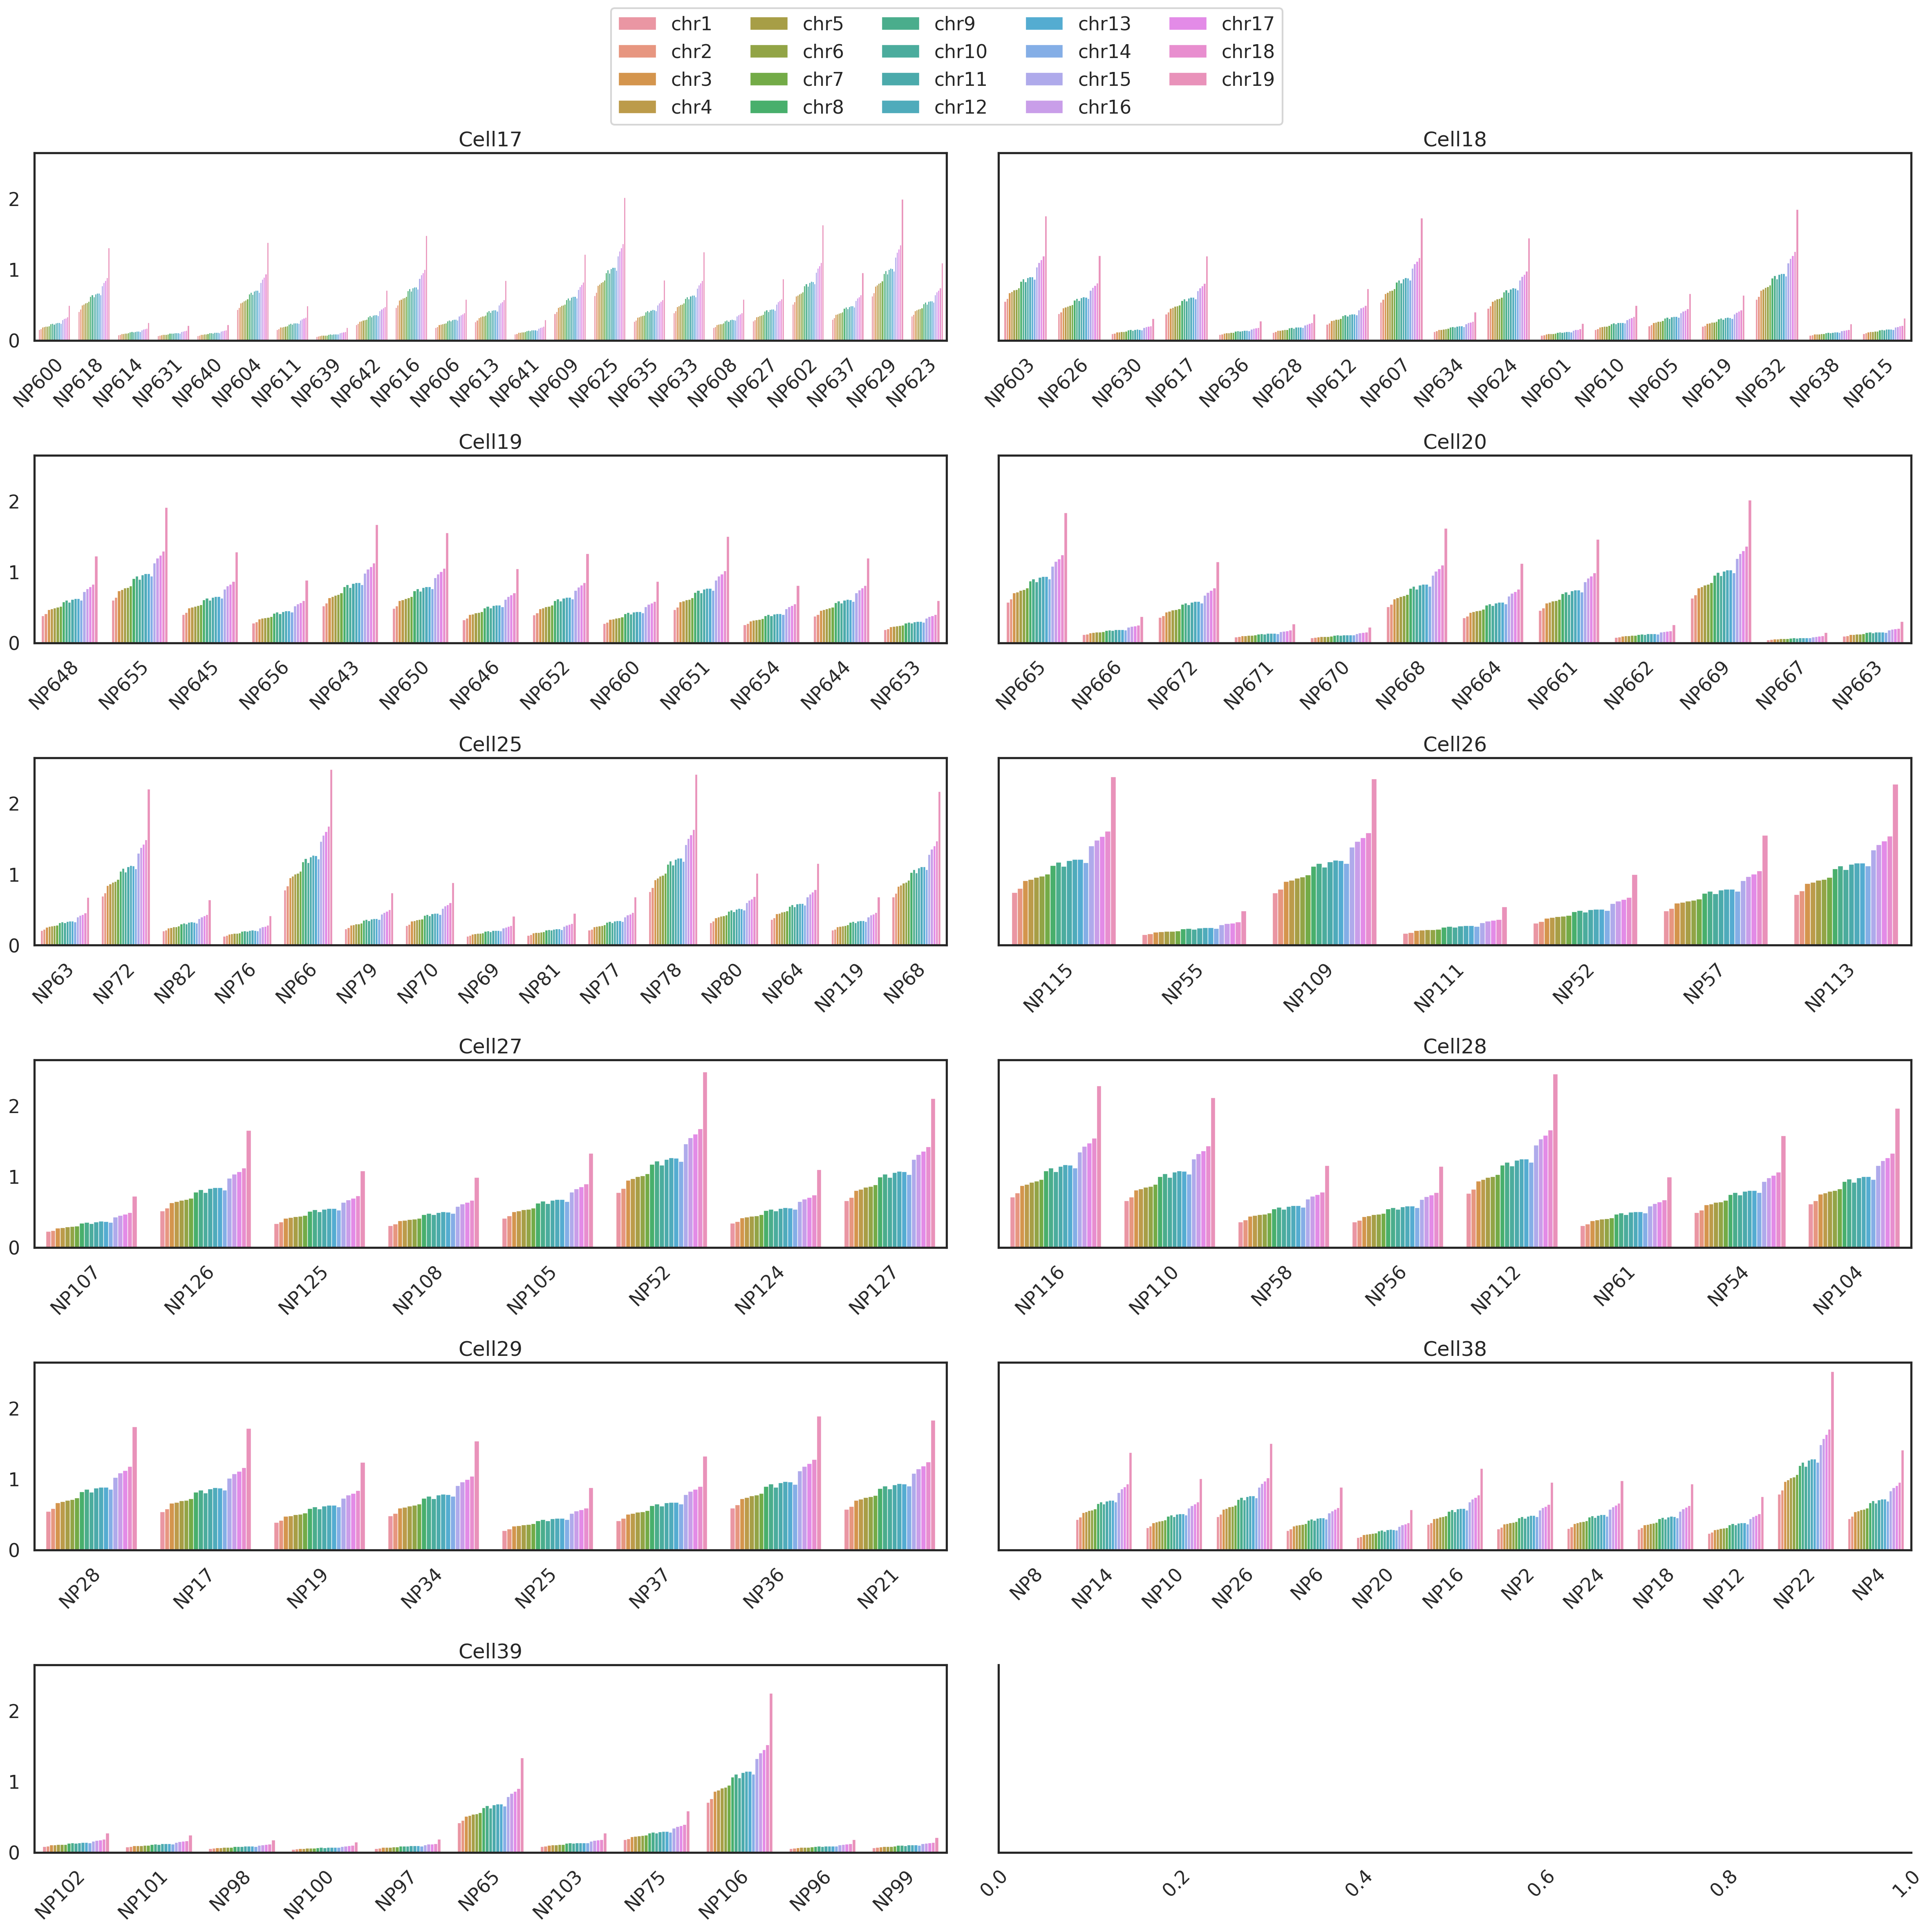

In [82]:
cell_name_all = ["Cell17", "Cell18", "Cell19", "Cell20", "Cell25", "Cell26", "Cell27", "Cell28", "Cell29", "Cell38", "Cell39"]
col_num = 2
# NP_capture_rate_10000bp["np_name"] = [i.np_name.split('-')[1].replace('_mm10','')  for _,i in NP_capture_rate_10000bp.iterrows()]
fig, ax = plt.subplots((len(cell_name_all)+col_num-1)//col_num, col_num, figsize=(col_num*12, 4*len(cell_name_all)//col_num), sharex=False, sharey=True, dpi=200)

for i,cell_name in enumerate(cell_name_all):
#     fig, ax = plt.subplots(figsize=(16, 3.5), dpi=300)
    plt.tight_layout()
    ax_1, ax_2 = i//col_num, i%col_num
#     sns.scatterplot(data=NP_capture_rate_10000bp[NP_capture_rate_10000bp.cell_name == cell_name], x="np_name", y="capture_rate", hue="chr_name", linewidth=0.5, ax=ax[ax_1][ax_2])
    sns.barplot(data=NP_capture_rate_10000bp[NP_capture_rate_10000bp.cell_name == cell_name], x="np_name", y="capture_rate", hue="chr_name", linewidth=0.5, ax=ax[ax_1][ax_2])
    ax[ax_1][ax_2].title.set_text(cell_name)
    # ax.set_xticklabels(['0-3'+'\n'+str(gene_num['0-3kb']), '3-10'+'\n'+str(gene_num['3-10kb']), '10-100'+'\n'+str(gene_num['10-100kb']), '100-1000'+'\n'+str(gene_num['100-1000kb']), '1000+'+'\n'+str(gene_num['1000kb+'])])
#     ax.set_xlabel("")
    ax[ax_1][ax_2].legend().set_visible(False)
#     ax[ax_1][ax_2].xaxis.set_visible(False)
    ax[ax_1][ax_2].set_ylabel("")
    ax[ax_1][ax_2].set_xlabel("")
    plt.setp(ax[ax_1][ax_2].get_xticklabels(), rotation=45, ha="right", va="top", rotation_mode="anchor")
    
    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)
        plt.gca().spines[pos].set_linewidth(0.2)

for j in range(col_num):
    ax[-1][j].xaxis.set_visible(True)
    plt.setp(ax[-1][j].get_xticklabels(), rotation=45, ha="right", va="top", rotation_mode="anchor")

for j in range(len(cell_name_all)//col_num):
    ax[j][-1].yaxis.set_visible(True)

plt.gca().tick_params(width=0.2)
# plt.gca().set_xlabel('NP name')
# plt.gca().set_ylabel('capture rate')
ax[0][0].legend(loc='lower center', bbox_to_anchor=(1, 1.1),
          fancybox=True, shadow=False, ncol=5)

plt.savefig('/home/ygli/gam_paper_data/code/figure/NP_catpure_rate_10kb.svg')
plt.show()

# 读取z轴信息和每个cell区分父本母本后的z轴数据
# 计算10kb分辨率下，每个cell每个NP每个亲本的10kb loci的捕获率
## 准确的



In [18]:
# determine_resolution.ipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import optimize
from scipy.stats import norm
import math
import sys
import os
import copy

sns.set_style("white")
sns.set_context("talk")
resolution = 10000
chr_name_list = ["chr"+str(i) for i in range(1,20)]

z_meta1 = pd.read_csv("/home/ygli/gam_paper_data/gam_seq_mapped_219/nuclear_size_B16_calculate_with_index.csv",sep='\t',header=None)
z_meta1.columns=['cell_name', 'np_name', 'mean_radius', 'NP_mean_nuclei_radius', 'zaxis']
z_meta2 = pd.read_csv("/home/ygli/gam_paper_data/gam_seq_mapped_414/nuclear_size_B18_414_calculate_with_index.csv",sep='\t',header=None)
z_meta2.columns=['cell_name', 'np_name', 'mean_radius', 'NP_mean_nuclei_radius', 'zaxis']
# z_meta["cellname_zaxis"] = [i.cell_name+'_'+str(i.zaxis) for _,i in z_meta.iterrows()]
z_meta = pd.concat([z_meta1, z_meta2], ignore_index = True)
z_meta.head()
# print(cell_name_all)

,cell_name,np_name,mean_radius,NP_mean_nuclei_radius,zaxis
0,Cell17,B16F-NP618,5.541787,3.477111,4.206656
1,Cell17,B16F-NP616,5.635500,3.564899,4.406656
2,Cell17,B16F-NP614,5.232750,3.186122,4.606656
3,Cell17,B16F-NP613,5.615500,3.546186,4.806656
4,Cell17,B16F-NP600,5.713875,3.638097,5.006656


In [5]:
# experiment_index_dic = dict(zip(cell_name_all, ["219"]*4+["414"]*7))
experiment_index_dic = dict(zip(['Cell17', 'Cell18', 'Cell19', 'Cell20', 'Cell25', 'Cell26', 'Cell27', 'Cell28', 'Cell38', 'Cell39'], ["219"]*4+["414"]*6))
target_resolution = 1e+4
dic_chr_size={"chr1":195471971,"chr2":182113224,"chr3":160039680,"chr4":156508116,"chr5":151834684,"chr6":149736546,"chr7":145441459,"chr8":129401213,"chr9":124595110,"chr10":130694993,"chr11":122082543,"chr12":120129022,"chr13":120421639,"chr14":124902244,"chr15":104043685,"chr16":98207768,"chr17":94987271,"chr18":90702639,"chr19":61431566}
len_target_resolution_chr_size = {i:dic_chr_size[i]//target_resolution for i in dic_chr_size}



cell_name_df = []
chr_name_df = []
strain_index_df = []
np_name_df = []
capture_rate_df = []

for cell_name in experiment_index_dic.keys():
    # cell_name = "Cell25"
    #experiment_index = "414"
    print("processing %s"%(cell_name))
    experiment_index = experiment_index_dic[cell_name]
    cell_strain = pd.read_csv("/home/ygli/gam_paper_data/gam_seq_mapped_"+experiment_index+"/z_location/gam_seq_mapped_"+experiment_index+"_"+cell_name+".csv")
    cell_strain["begin_target_resolution"] = map(int,cell_strain.start//target_resolution*target_resolution)
    #cell_strain.head()
    for chr_name in chr_name_list:
#         chr_name = 'chr1'
#         strain_index = 0
        for strain_index in [0,1]:
            cell_strain_thischr = cell_strain.loc[(cell_strain.chr==chr_name) & (cell_strain.parents_KNN==strain_index)]
            np_name_all_thiscell_thischr = list(set(cell_strain_thischr.np_name))
            for np_name in np_name_all_thiscell_thischr:
#             np_name = np_name_all_thiscell_thischr[0]
                cell_strain_thischr_thisNP = cell_strain_thischr[cell_strain_thischr.np_name==np_name]
                capture_rate = len(list(set(cell_strain_thischr_thisNP.begin_target_resolution)))/len_target_resolution_chr_size[chr_name]
                cell_name_df.append(cell_name)
                chr_name_df.append(chr_name)
                strain_index_df.append(strain_index)
                np_name_df.append(np_name)
                capture_rate_df.append(capture_rate)

capture_rete_with_strain = pd.DataFrame({
    "cell_name": cell_name_df,
    "chr_name": chr_name_df,
    "strain_index": strain_index_df,
    "np_name": np_name_df,
    "capture_rate": capture_rate_df,
})




processing Cell39
processing Cell38
processing Cell28
processing Cell17
processing Cell25
processing Cell19
processing Cell18
processing Cell26
processing Cell27
processing Cell20


In [21]:
# capture_rete_with_strain.to_csv("/home/ygli/gam_paper_data/merge_219_414_capturerate_eachNP_10000bp_withstrain.csv", index=None)
# capture_rete_with_strain.head()
#将NP的capture率与NP的z轴信息合并起来
capture_rete_with_strain_with_z = pd.merge(capture_rete_with_strain, z_meta.loc[:, ['np_name', 'zaxis']], on='np_name' ,how='left' ) 
capture_rete_with_strain_with_z.to_csv("/home/ygli/gam_paper_data/merge_219_414_capturerate_eachNP_10000bp_withstrain.csv", index=None)
capture_rete_with_strain_with_z.head()


,capture_rate,cell_name,chr_name,np_name,strain_index,zaxis
0,0.014631,Cell39,chr1,B18F-NP75,0,1.043765
1,0.006651,Cell39,chr1,B18F-NP98,0,1.843765
2,0.007060,Cell39,chr1,B18F-NP99,0,2.043765
3,0.006293,Cell39,chr1,B18F-NP96,0,1.243765
4,0.006497,Cell39,chr1,B18F-NP97,0,1.643765


In [ ]:
capture_rete_with_strain.shape

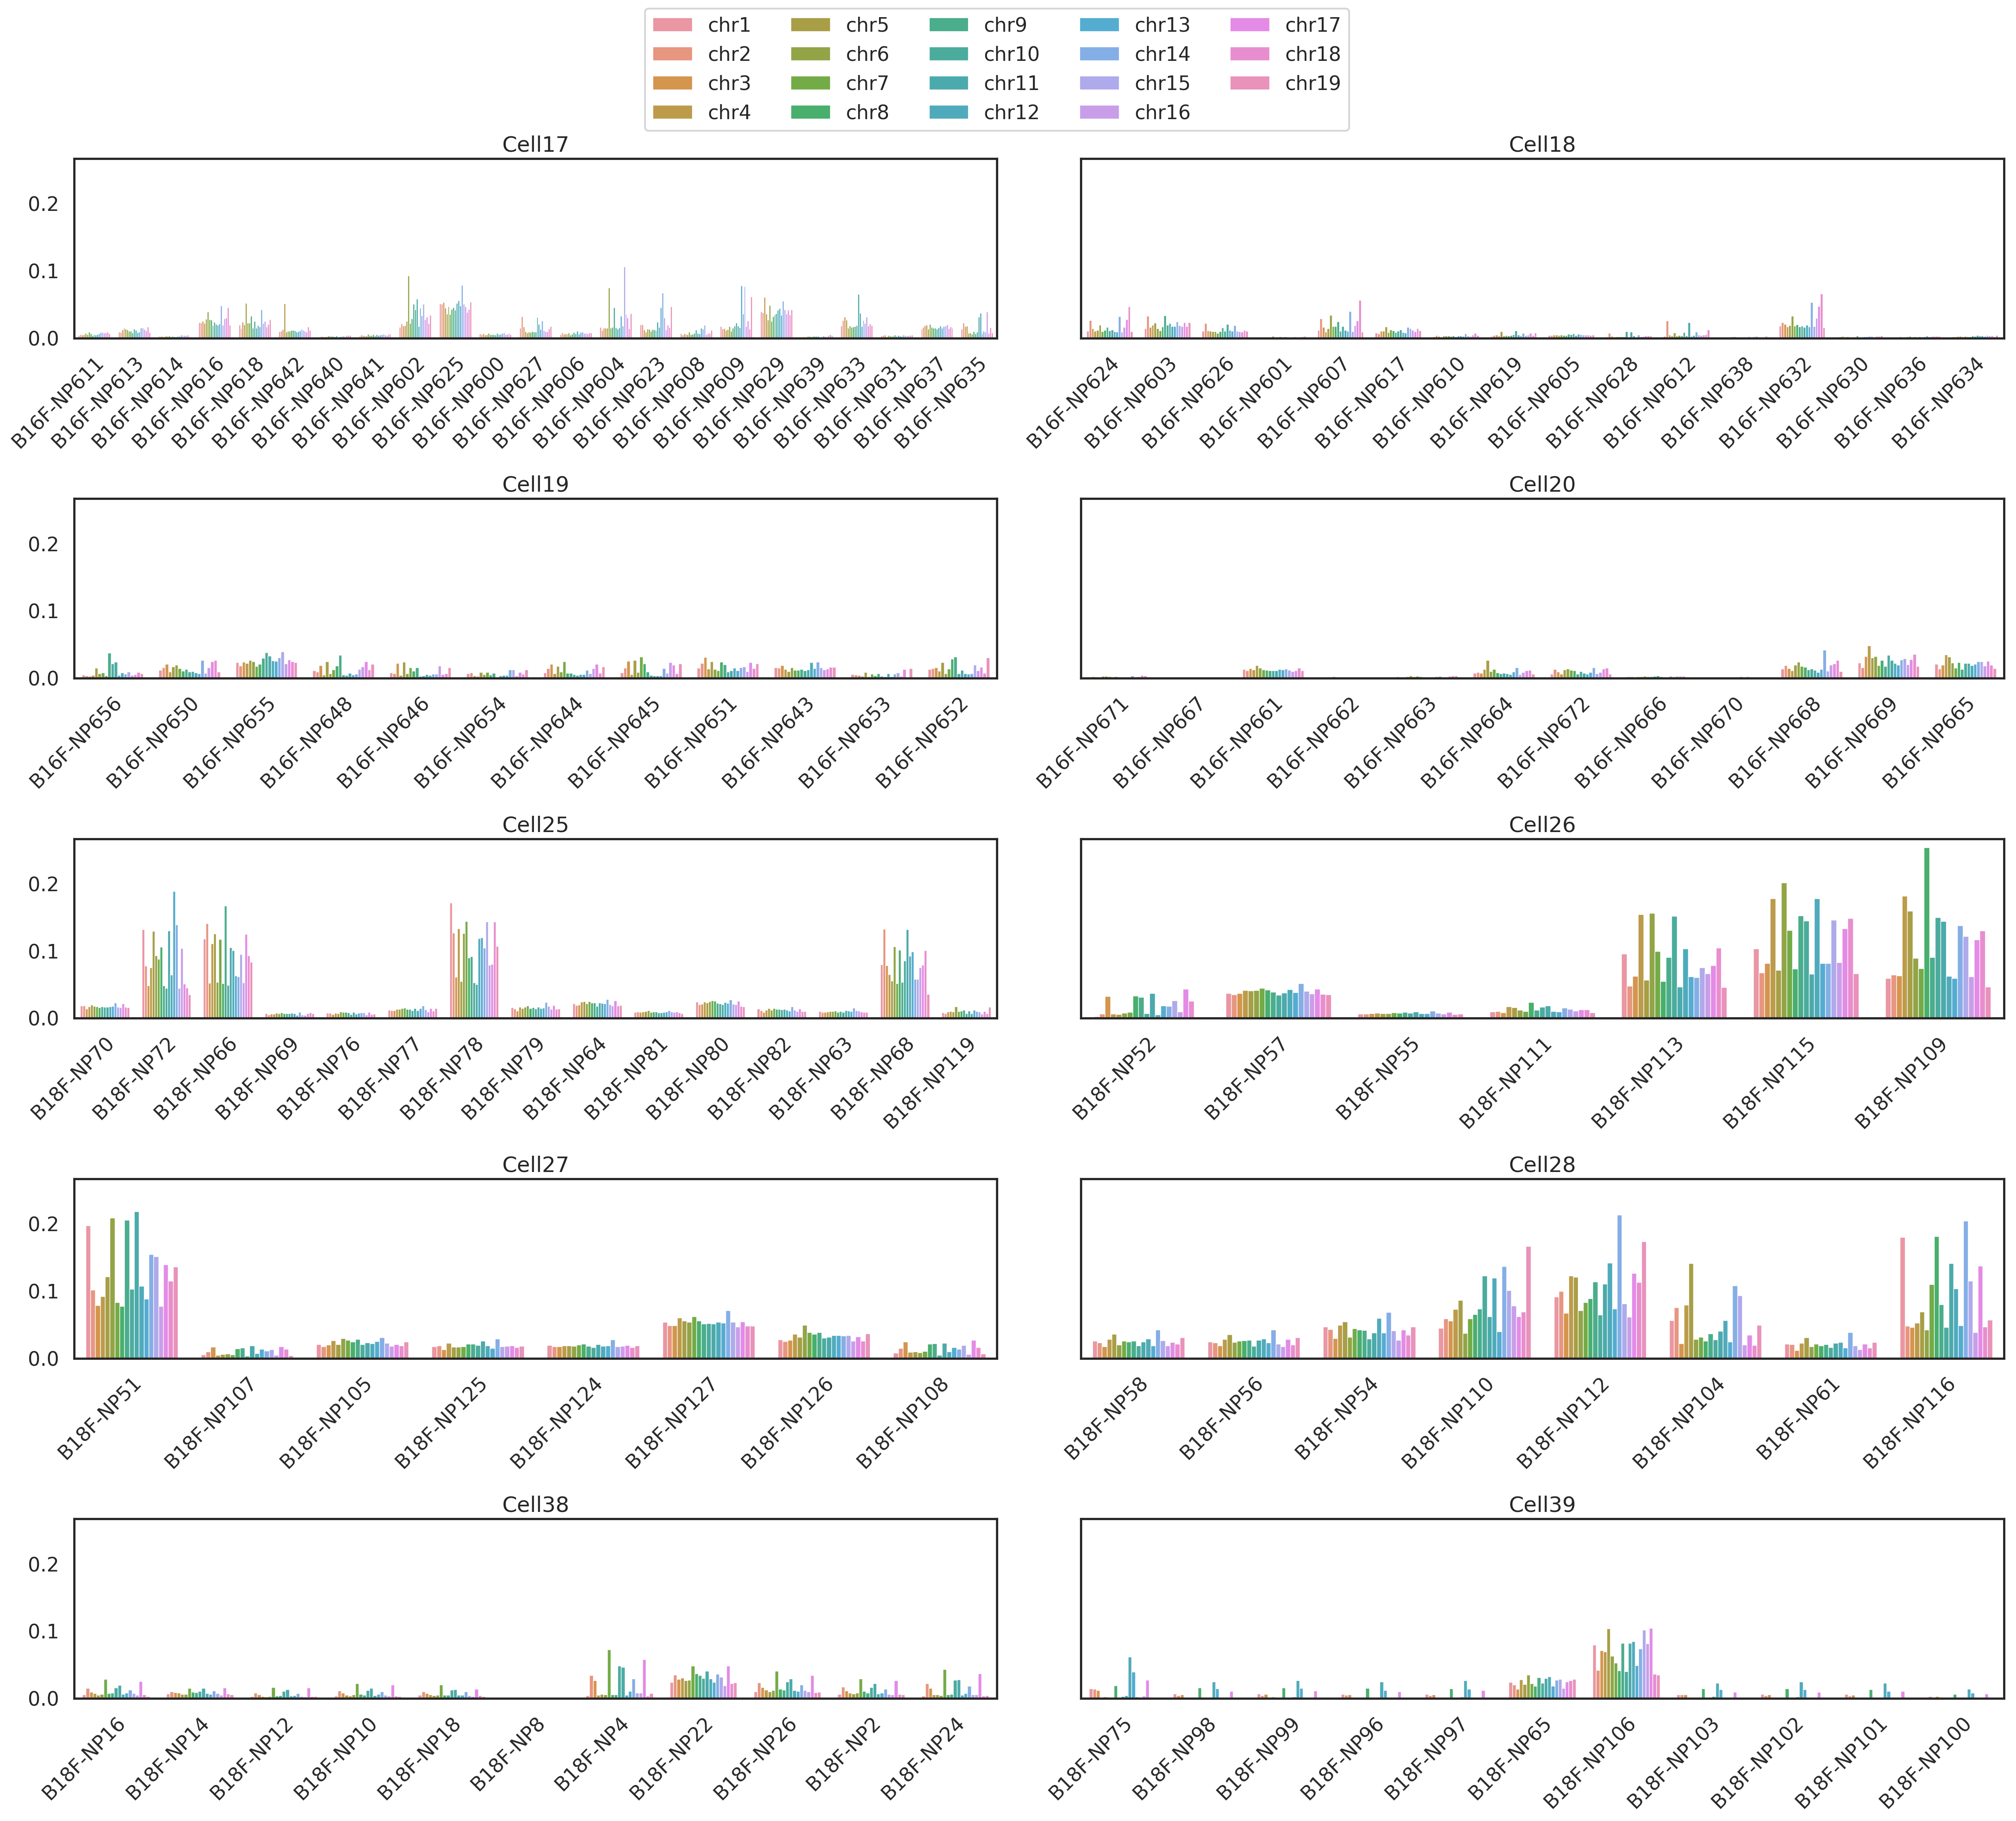

In [13]:
cell_name_all = ["Cell17", "Cell18", "Cell19", "Cell20", "Cell25", "Cell26", "Cell27", "Cell28", "Cell38", "Cell39"]
col_num = 2
strain_plot_here=0
# NP_capture_rate_10000bp["np_name"] = [i.np_name.split('-')[1].replace('_mm10','')  for _,i in NP_capture_rate_10000bp.iterrows()]
fig, ax = plt.subplots((len(cell_name_all)+col_num-1)//col_num, col_num, figsize=(col_num*12, 4*len(cell_name_all)//col_num), sharex=False, sharey=True, dpi=200)

for i,cell_name in enumerate(cell_name_all):
#     fig, ax = plt.subplots(figsize=(16, 3.5), dpi=300)
    plt.tight_layout()
    ax_1, ax_2 = i//col_num, i%col_num
    sns.barplot(data=capture_rete_with_strain.loc[(capture_rete_with_strain.cell_name == cell_name) & (capture_rete_with_strain.strain_index==strain_plot_here)], x="np_name", y="capture_rate", hue="chr_name", linewidth=0.5, ax=ax[ax_1][ax_2])
    ax[ax_1][ax_2].title.set_text(cell_name)
    # ax.set_xticklabels(['0-3'+'\n'+str(gene_num['0-3kb']), '3-10'+'\n'+str(gene_num['3-10kb']), '10-100'+'\n'+str(gene_num['10-100kb']), '100-1000'+'\n'+str(gene_num['100-1000kb']), '1000+'+'\n'+str(gene_num['1000kb+'])])
#     ax.set_xlabel("")
    ax[ax_1][ax_2].legend().set_visible(False)
#     ax[ax_1][ax_2].xaxis.set_visible(False)
    ax[ax_1][ax_2].set_ylabel("")
    ax[ax_1][ax_2].set_xlabel("")
    plt.setp(ax[ax_1][ax_2].get_xticklabels(), rotation=45, ha="right", va="top", rotation_mode="anchor")
    
#     for pos in ['right', 'top']:
#         plt.gca().spines[pos].set_visible(False)
#         plt.gca().spines[pos].set_linewidth(0.2)

for j in range(col_num):
    ax[-1][j].xaxis.set_visible(True)
    plt.setp(ax[-1][j].get_xticklabels(), rotation=45, ha="right", va="top", rotation_mode="anchor")

for j in range(len(cell_name_all)//col_num):
    ax[j][-1].yaxis.set_visible(True)

plt.gca().tick_params(width=0.2)
# plt.gca().set_xlabel('NP name')
# plt.gca().set_ylabel('capture rate')
ax[0][0].legend(loc='lower center', bbox_to_anchor=(1, 1.1),
          fancybox=True, shadow=False, ncol=5)

plt.savefig('/home/ygli/gam_paper_data/code/figure/NP_catpure_rate_10kb_strain_'+str(strain_plot_here)+'.svg')
plt.show()


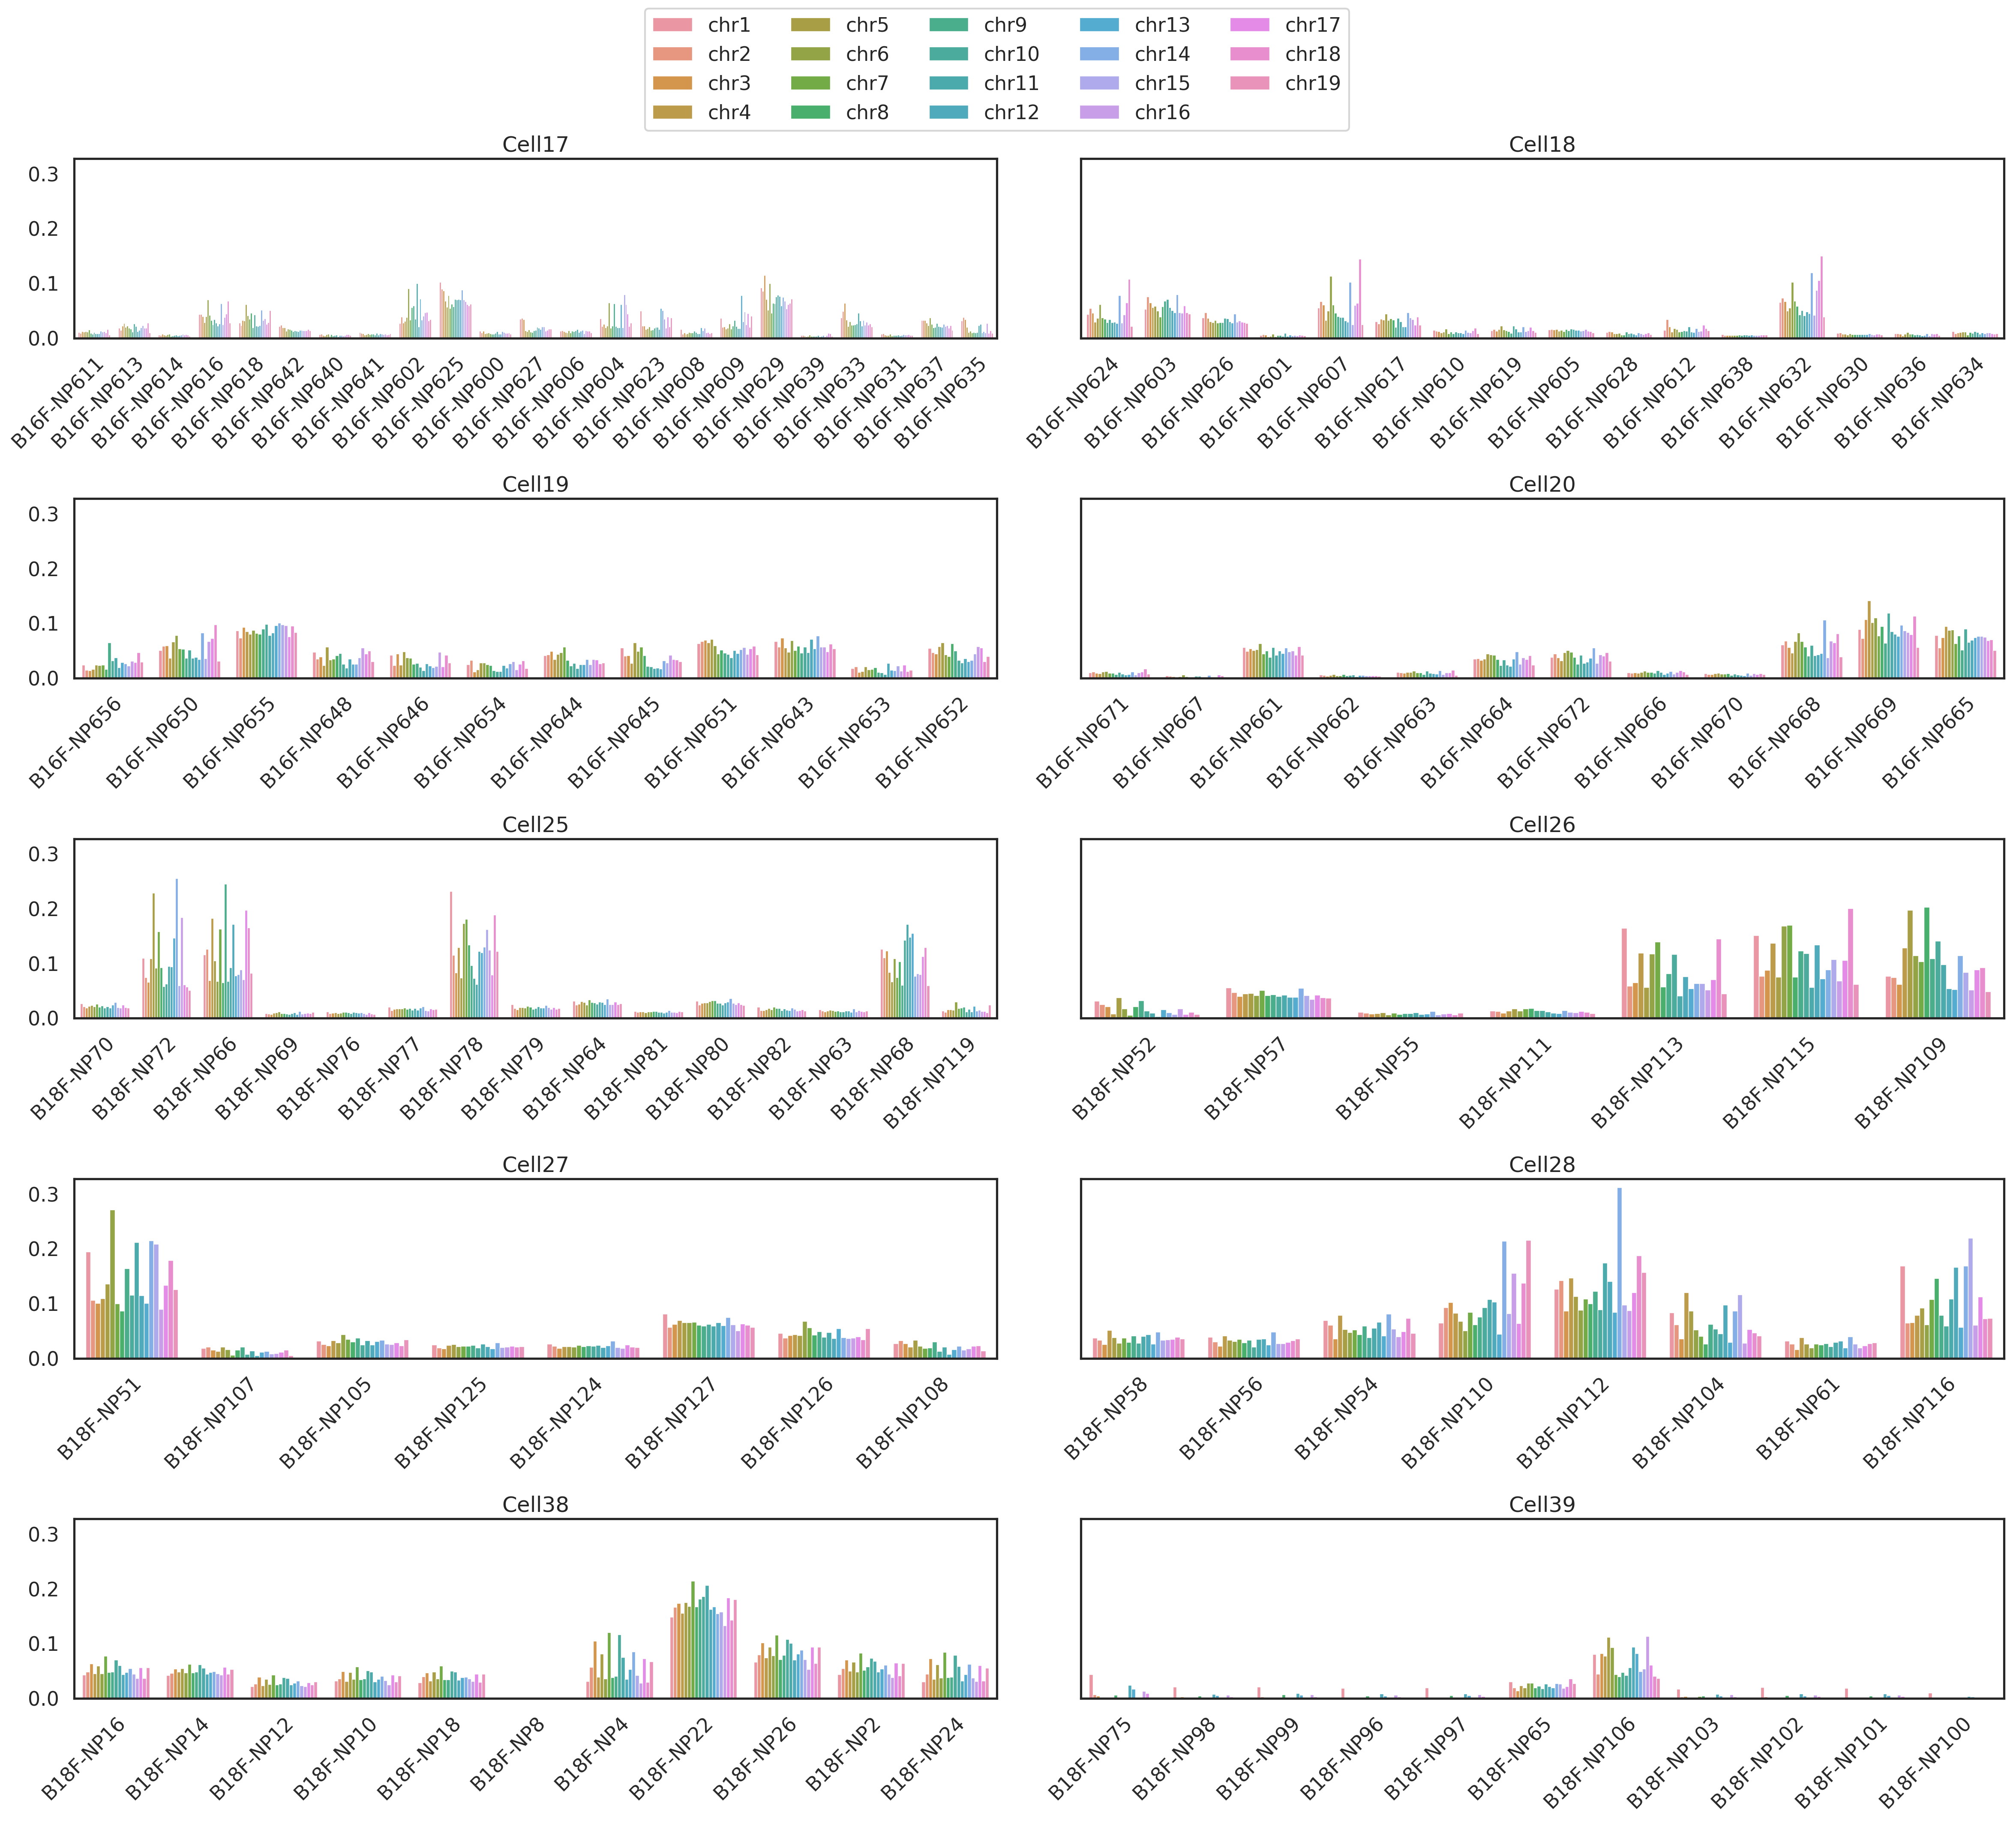

In [12]:
cell_name_all = ["Cell17", "Cell18", "Cell19", "Cell20", "Cell25", "Cell26", "Cell27", "Cell28", "Cell38", "Cell39"]
col_num = 2
strain_plot_here=1
# NP_capture_rate_10000bp["np_name"] = [i.np_name.split('-')[1].replace('_mm10','')  for _,i in NP_capture_rate_10000bp.iterrows()]
fig, ax = plt.subplots((len(cell_name_all)+col_num-1)//col_num, col_num, figsize=(col_num*12, 4*len(cell_name_all)//col_num), sharex=False, sharey=True, dpi=200)

for i,cell_name in enumerate(cell_name_all):
#     fig, ax = plt.subplots(figsize=(16, 3.5), dpi=300)
    plt.tight_layout()
    ax_1, ax_2 = i//col_num, i%col_num
    sns.barplot(data=capture_rete_with_strain.loc[(capture_rete_with_strain.cell_name == cell_name) & (capture_rete_with_strain.strain_index==strain_plot_here)], x="np_name", y="capture_rate", hue="chr_name", linewidth=0.5, ax=ax[ax_1][ax_2])
    ax[ax_1][ax_2].title.set_text(cell_name)
    # ax.set_xticklabels(['0-3'+'\n'+str(gene_num['0-3kb']), '3-10'+'\n'+str(gene_num['3-10kb']), '10-100'+'\n'+str(gene_num['10-100kb']), '100-1000'+'\n'+str(gene_num['100-1000kb']), '1000+'+'\n'+str(gene_num['1000kb+'])])
#     ax.set_xlabel("")
    ax[ax_1][ax_2].legend().set_visible(False)
#     ax[ax_1][ax_2].xaxis.set_visible(False)
    ax[ax_1][ax_2].set_ylabel("")
    ax[ax_1][ax_2].set_xlabel("")
    plt.setp(ax[ax_1][ax_2].get_xticklabels(), rotation=45, ha="right", va="top", rotation_mode="anchor")
    
#     for pos in ['right', 'top']:
#         plt.gca().spines[pos].set_visible(False)
#         plt.gca().spines[pos].set_linewidth(0.2)

for j in range(col_num):
    ax[-1][j].xaxis.set_visible(True)
    plt.setp(ax[-1][j].get_xticklabels(), rotation=45, ha="right", va="top", rotation_mode="anchor")

for j in range(len(cell_name_all)//col_num):
    ax[j][-1].yaxis.set_visible(True)

plt.gca().tick_params(width=0.2)
# plt.gca().set_xlabel('NP name')
# plt.gca().set_ylabel('capture rate')
ax[0][0].legend(loc='lower center', bbox_to_anchor=(1, 1.1),
          fancybox=True, shadow=False, ncol=5)

plt.savefig('/home/ygli/gam_paper_data/code/figure/NP_catpure_rate_10kb_strain_'+str(strain_plot_here)+'.svg')
plt.show()
